In [32]:
from bentley_ottmann.base import segments_intersections
import poly_point_isect
from shapely.geometry import Point, Polygon, LineString

In [28]:
line1 = [(0,0), (1,1), (8,5)]
line2 = [(1,0), (7,3), (3,3)]
l1=LineString([Point(p) for p in line1])
poly_point_isect.isect_polygon((line1+line2))

[(1.0, 1.0), (4.5, 3.0), (5.2, 3.0)]

In [29]:
l=line1+line2
l

[(0, 0), (1, 1), (8, 5), (1, 0), (7, 3), (3, 3)]

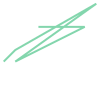

In [31]:
points=[]
for p in l:
    points.append(Point(p))
LineString(points)
    

In [37]:
l1=LineString([Point(p) for p in line1])
l2=LineString([Point(p) for p in line2])
ii=l1.intersection(l2)
print((ii))

POINT (4.5 3)


In [23]:
from shapely.geometry import LineString, Point
from shapely.ops import linemerge

def getProyection(aline, point_coords):
    return aline.interpolate(aline.project(Point(point_coords)))

def mergeInside(aline, inside_line):
    mline_tups = [(aline.project(Point(p)), p) for p in aline.coords]
    mline_tups.extend([ (aline.project(Point(p)), getProyection(aline, p))
                                    for p in inside_line.coords])
    mline_tups.sort()
    return LineString([p for _, p in mline_tups])

line = LineString([(2, 5), (2.1, 1)])  # slightly oblique line
point1 = Point(2.5, 3)
int1 = line.intersection(point1.buffer(1))
int2 = line.intersection(point1.buffer(1.3))
merged_line = mergeInside(int2, int1)

print(int1)
print(int2)
print(merged_line)

LINESTRING (2.02796158358983 3.881536656406788, 2.072567874421353 2.097285023145893)
LINESTRING (2.019819096605441 4.207236135782384, 2.080725721869193 1.770971125232286)
LINESTRING (2.019819096605441 4.207236135782384, 2.027961583589831 3.881536656406788, 2.072567874421353 2.097285023145893, 2.080725721869193 1.770971125232286)


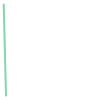

In [24]:
line